In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from scipy import stats as st 
from sklearn import linear_model

In [55]:
dirty_train_data = pd.read_csv('train_set.csv')
dirty_test_data = pd.read_csv('test_set .csv')


In [56]:
train_set = dirty_train_data.dropna()
test_set = dirty_test_data.dropna()
print('Rows before dropna:',dirty_train_data.size,"\n")
print('Rows after dropna:',train_set.size,"\n")


Rows before dropna: 1400 

Rows after dropna: 1398 



In [57]:
print(train_set.loc[0:5]['y'])
print(train_set.loc[0:5]['x'])

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
5    32.463875
Name: y, dtype: float64
0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
5    36.0
Name: x, dtype: float64


In [58]:
X_train_set = train_set.as_matrix(['x'])
Y_train_set = train_set.as_matrix(['y'])

X_test_set = test_set.as_matrix(['x'])
Y_test_set = test_set.as_matrix(['y'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [59]:
print('MEAN:',"\n")
print('Mean of X_train_set:',np.mean(X_train_set),"\n")
print('Mean of Y_train_set:',np.mean(Y_train_set),"\n")
print("--------------------------------------------------------")
print('MEDIAN:',"\n")
print('Median of X_train_set:',np.median(X_train_set),"\n")
print('Median of Y_train_set:',np.median(Y_train_set),"\n")
print('--------------------------------------------------------')
print('Standard Deviation of X_train_set:',np.std(X_train_set),"\n")
print('Standard Deviation of Y_train_set:',np.std(Y_train_set),"\n")
print("--------------------------------------------------------")

MEAN: 

Mean of X_train_set: 50.01430615164521 

Mean of Y_train_set: 49.939869170457804 

--------------------------------------------------------
MEDIAN: 

Median of X_train_set: 49.0 

Median of Y_train_set: 48.97302037 

--------------------------------------------------------
Standard Deviation of X_train_set: 28.933841385275375 

Standard Deviation of Y_train_set: 29.08838760426971 

--------------------------------------------------------


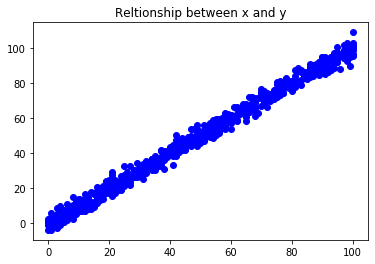

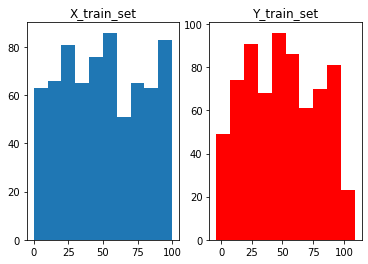

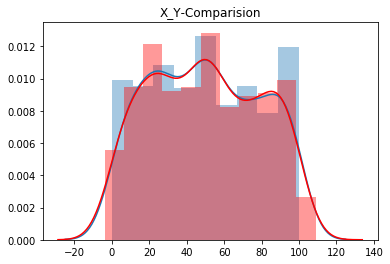

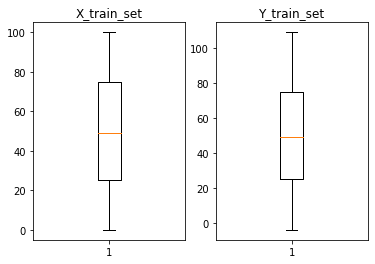

In [60]:
plt.title('Reltionship between x and y')
plt.scatter(X_train_set , Y_train_set , color='blue')
plt.show()

plt.subplot(1,2,1)
plt.title('X_train_set')
plt.hist(X_train_set)

plt.subplot(1,2,2)
plt.title('Y_train_set')
plt.hist(Y_train_set,color='red')
plt.show()

plt.title('X_Y-Comparision')
sns.distplot(X_train_set)
sns.distplot(Y_train_set,color= 'red')
plt.show()

plt.subplot(1,2,1)
plt.title('X_train_set')
plt.boxplot(X_train_set)

plt.subplot(1,2,2)
plt.title('Y_train_set')
plt.boxplot(Y_train_set)
plt.show()


In [66]:
lm = linear_model.LinearRegression()
lm.fit(X_train_set,Y_train_set)
print("R^(2):",lm.score(X_train_set,Y_train_set))
print("Correlation:",math.sqrt(lm.score(X_train_set,Y_train_set)))
print("Coefficient for X:", lm.coef_)
print('..........................................')
print("Intercept for X:",lm.intercept_)#not required for one feature or when value of Rsq is pretty high 
print('..........................................')
print('standard Error:',st.sem(X_train_set))

R^(2): 0.9907015319025518
Correlation: 0.9953399077212527
Coefficient for X: [[1.00065638]]
..........................................
Intercept for X: [-0.10726546]
..........................................
standard Error: [1.09516205]


In [67]:
ttest = lm.coef_/st.sem(X_train_set)
print("The t-statistics:",ttest)

The t-statistics: [[0.91370623]]


In [74]:
print("two tailed p-values:")

#st.pearsonr(X_train_set,Y_train_set)

two tailed p-values:


In [85]:
TSS = Y_train_set
TSS = [i**2 for i in TSS]
TSS = np.sum(TSS)

y_predicted = lm.predict(X_train_set)
y_variance = Y_train_set - y_predicted 
y_variance = [i**2 for i in y_variance]
RSS = np.sum(y_variance)

Fstatistics = (TSS - RSS) / (RSS/(np.size(y_predicted) - 2))
print('Fstatistics is :', Fstatistics)

Fstatistics is : 295202.86908682744


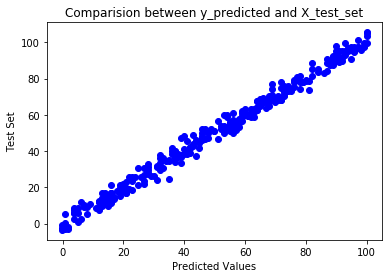

In [86]:
y_predicted = lm.predict(X_test_set)
plt.title('Comparision between y_predicted and X_test_set')
plt.xlabel('Predicted Values')
plt.ylabel('Test Set')
plt.scatter(y_predicted , Y_test_set,color = 'blue')
plt.show()

In [ ]:
#a good fit 